In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)




Mounted at /content/drive


In [ ]:
cd drive/MyDrive/BeeruKudasai

/content/drive/MyDrive/BeeruKudasai


In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("beer_reviews.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [ ]:
tochange_df=df.drop(["brewery_id","brewery_name","review_time","review_aroma","review_appearance","beer_style","review_palate","review_taste","beer_abv","beer_beerid"],1)

<ipython-input-7-7ef0cb1ef7c4>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tochange_df=df.drop(["brewery_id","brewery_name","review_time","review_aroma","review_appearance","beer_style","review_palate","review_taste","beer_abv"],1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [ ]:
tochange_df.iloc[0]

review_overall                 1.5
review_profilename         stcules
beer_name             Sausa Weizen
beer_beerid                  47986
Name: 0, dtype: object

In [ ]:
tochange_df.iloc[0].review_profilename

'stcules'

In [ ]:
rev_df=tochange_df.rename(columns={"review_profilename": "user","review_overall":"rating"})

creazione ID per utenti

In [ ]:
grouped_user = rev_df.groupby('user')

temp_df_user = grouped_user.count()
temp_df_user_idx = pd.DataFrame(temp_df_user.index)


temp_df_user_idx['userID']=temp_df_user_idx.index
dict_df_user=temp_df_user_idx[['userID','user']] 


desc_dict_user = dict_df_user.set_index('user').to_dict()
new_dict_user = desc_dict_user['userID']

rev_df['userID'] = rev_df.user.map(new_dict_user)

In [ ]:
rev_df.describe()

,rating,beer_beerid,userID
count,1.586614e+06,1.586614e+06,1.586266e+06
mean,3.815581e+00,2.171279e+04,1.613796e+04
std,7.206219e-01,2.181834e+04,9.712220e+03
min,0.000000e+00,3.000000e+00,0.000000e+00
25%,3.500000e+00,1.717000e+03,7.770000e+03
50%,4.000000e+00,1.390600e+04,1.536700e+04
75%,4.500000e+00,3.944100e+04,2.467400e+04
max,5.000000e+00,7.731700e+04,3.338600e+04


Histogramma e analisi dati

In [ ]:
print('Total Unique Users in this dataset: {}'.format(len(rev_df.user.unique())))
print('Total Unique Beer in this dataset: {}'.format(len(rev_df.beer_name.unique())))

Total Unique Users in this dataset: 33388
Total Unique Beer in this dataset: 56857


<ipython-input-43-fcd63e2be5d8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data, bins=20, kde=False)
<ipython-input-43-fcd63e2be5d8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=second_ax, kde=True, hist=False)


Text(0.5, 1.0, 'Histogram of Review Counts')

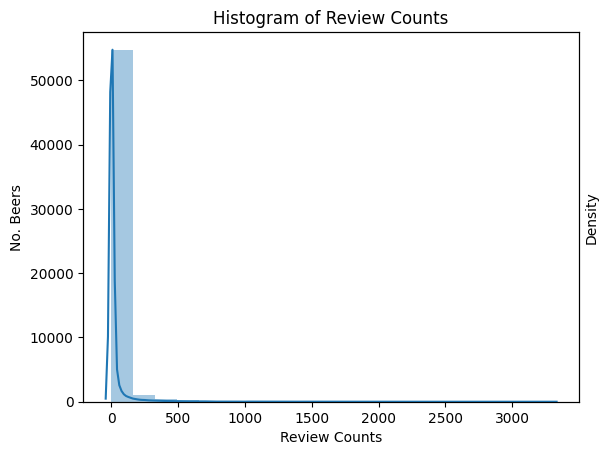

In [ ]:
  data= rev_df.beer_name.value_counts()

# Plotting hist without kde
ax = sns.distplot(data, bins=20, kde=False)

# Creating another Y axis
second_ax = ax.twinx()

# Plotting kde without hist on the second Y axis
sns.distplot(data, ax=second_ax, kde=True, hist=False)

#Removing Y ticks from the second axis
second_ax.set_yticks([])

# Set labels
ax.set_xlabel('Review Counts')
ax.set_ylabel('No. Beers')
ax.set_title("Histogram of Review Counts")

<ipython-input-15-29eb3cc0ca58>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(data2, kde=False)
<ipython-input-15-29eb3cc0ca58>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2, ax=second_ax2, kde=True, hist=False)


Text(0.5, 1.0, 'Histogram of User Counts')

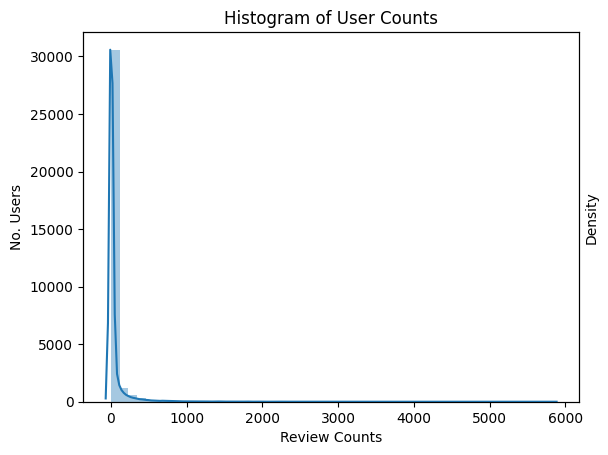

In [ ]:
data2= rev_df.user.value_counts()

# Plotting hist without kde
ax2 = sns.distplot(data2, kde=False)

# Creating another Y axis
second_ax2 = ax2.twinx()

# Plotting kde without hist on the second Y axis
sns.distplot(data2, ax=second_ax2, kde=True, hist=False)

#Removing Y ticks from the second axis
second_ax2.set_yticks([])

# Set labels
ax2.set_xlabel('Review Counts')
ax2.set_ylabel('No. Users')
ax2.set_title("Histogram of User Counts")

In [ ]:
grouped_users = rev_df.groupby('user')

In [ ]:
grouped_users_count = grouped_users.count()

counts = [1,2,3,4,5,10,15,20]
for ct in counts:
    num_users = grouped_users_count[grouped_users_count['rating'] <= ct].count()[0]
    print('{} users rated {} or less beers'.format(num_users,ct))

print('\n')


10443 users rated 1 or less beers
14550 users rated 2 or less beers
16976 users rated 3 or less beers
18576 users rated 4 or less beers
19821 users rated 5 or less beers
23198 users rated 10 or less beers
24846 users rated 15 or less beers
25863 users rated 20 or less beers




In [ ]:
grouped_beers = rev_df.groupby('beer_name')

In [ ]:
grouped_beers.count().sort_values(by='user', ascending = False).quantile(np.arange(0,1,.05))

,rating,user,beer_beerid,userID
0.00,1.0,0.0,1.0,0.0
0.05,1.0,1.0,1.0,1.0
0.10,1.0,1.0,1.0,1.0
0.15,1.0,1.0,1.0,1.0
0.20,1.0,1.0,1.0,1.0
0.25,1.0,1.0,1.0,1.0
0.30,1.0,1.0,1.0,1.0
0.35,2.0,2.0,2.0,2.0
0.40,2.0,2.0,2.0,2.0
0.45,2.0,2.0,2.0,2.0


Circa 85% ha almeno 20 review

In [ ]:
grouped_beers.mean().sort_values(by='rating', ascending = False).quantile(np.arange(0,1,.05))

<ipython-input-20-61807a89d470>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_beers.mean().sort_values(by='rating', ascending = False).quantile(np.arange(0,1,.05))


,rating,beer_beerid,userID
0.00,1.000000,3.000000,14.000000
0.05,2.500000,3806.800000,3854.000000
0.10,2.966667,7812.600000,6606.083333
0.15,3.000000,12183.400000,9327.660714
0.20,3.250000,16517.200000,10993.000000
0.25,3.416667,20674.666667,12391.850000
0.30,3.500000,24821.800000,13424.416667
0.35,3.500000,28836.200000,14323.000000
0.40,3.596774,33117.800000,14929.000000
0.45,3.700000,37076.200000,15508.371429


birra con rating sotto a 3 è sotto al 15% delle birre

In [ ]:
avg_rating = grouped_beers.mean()


# tolgo le birre con meno di 4 dichiarandole meno "importanti" (cutting hard for ram problem)
subpar_average_mask = avg_rating['rating'] < 4
subpar_beers_count = len(avg_rating[subpar_average_mask])

print('{} beers have a average rating less than 3'.format(subpar_beers_count))
print('A 4 avg rating puts the beer within the bottom 75%-tile')

35154 beers have a average rating less than 3
A 3 avg rating puts the beer within the bottom 15%-tile


<ipython-input-13-86a6b9f8ba13>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating = grouped_beers.mean()


Creazione di secondo dataset dove tolgo parte delle birre, ovvero quelle con punteggio troppo basso

In [ ]:
subpar_beers_list = list(avg_rating[subpar_average_mask].index)

ratings_count = grouped_beers.count()

# I am definining beers with ratings count less than 9 to be considered low amount of ratings 
# since a ratings count of 13 would put it in the bottom 75 percentile(cutting the number as much for ram problem)
low_ratings_count = ratings_count[ratings_count['rating'] < 9]
low_ratings_list = list(low_ratings_count.index)

In [ ]:
unique_subpar_beers = set(subpar_beers_list)
unique_low_ratings_beers = set(low_ratings_list)
overlaps = unique_subpar_beers.intersection(unique_low_ratings_beers)
print('Number of beers in bottom 75% of avg rating: {}'.format(len(unique_subpar_beers)))
print('Number of beers in bottom 75% of review counts: {}'.format(len(unique_low_ratings_beers)))
print('Number of beers in both of these categories: {}'.format(len(overlaps)))

Number of beers in bottom 15% of avg rating: 35154
Number of beers in bottom 30% of review counts: 42120
Number of beers in both of these categories: 24057


quindi tolte un totale di 35154 + (42120-24057)

In [ ]:
#remove beers in the bottom  of both categories
df1 = rev_df[~rev_df.beer_name.isin(subpar_beers_list)]
df2 = df1[~df1.beer_name.isin(low_ratings_list)]
rev_df2 = copy.deepcopy(df2)

In [ ]:
rev_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515037 entries, 19 to 1586613
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rating       515037 non-null  float64
 1   user         514922 non-null  object 
 2   beer_name    515037 non-null  object 
 3   beer_beerid  515037 non-null  int64  
 4   userID       514922 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 23.6+ MB


In [ ]:
print('Original number of unique beers: {}'.format(len(rev_df.beer_name.unique())))
print('Revised number of unique beers: {}'.format(len(rev_df2.beer_name.unique())))

Original number of unique beers: 56857
Revised number of unique beers: 3640


new histogramma per nuovi dati

<ipython-input-46-b759b48a2ca9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data, bins=20, kde=False)
<ipython-input-46-b759b48a2ca9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, ax=second_ax, kde=True, hist=False)


Text(0.5, 1.0, 'Histogram of Review Counts')

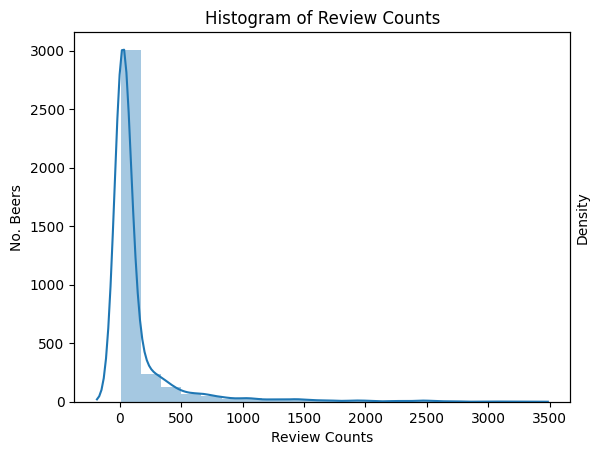

In [ ]:
  data1= rev_df2.beer_name.value_counts()

# Plotting hist without kde
ax = sns.distplot(data, bins=20, kde=False)

# Creating another Y axis
second_ax = ax.twinx()

# Plotting kde without hist on the second Y axis
sns.distplot(data, ax=second_ax, kde=True, hist=False)

#Removing Y ticks from the second axis
second_ax.set_yticks([])

# Set labels
ax.set_xlabel('Review Counts')
ax.set_ylabel('No. Beers')
ax.set_title("Histogram of Review Counts")

<ipython-input-47-ccbb696f7b0e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(data2, kde=False)
<ipython-input-47-ccbb696f7b0e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data2, ax=second_ax2, kde=True, hist=False)


Text(0.5, 1.0, 'Histogram of User Counts')

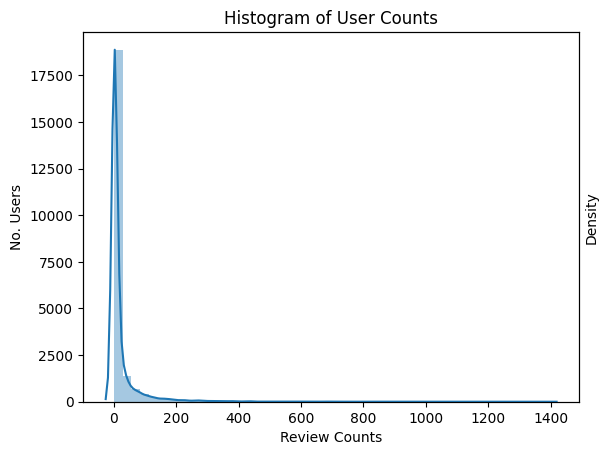

In [ ]:
data2= rev_df2.user.value_counts()

# Plotting hist without kde
ax2 = sns.distplot(data2, kde=False)

# Creating another Y axis
second_ax2 = ax2.twinx()

# Plotting kde without hist on the second Y axis
sns.distplot(data2, ax=second_ax2, kde=True, hist=False)

#Removing Y ticks from the second axis
second_ax2.set_yticks([])

# Set labels
ax2.set_xlabel('Review Counts')
ax2.set_ylabel('No. Users')
ax2.set_title("Histogram of User Counts")

In [ ]:
from surprise import SVD, KNNBasic, NMF
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import KNNBaseline, SVD
from surprise import get_dataset_dir
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Modifiche di funzioni della libreria

In [ ]:
# create beerID for each beer

grouped_name = rev_df2.groupby('beer_name')

temp_df = grouped_name.count()
temp_df_idx = pd.DataFrame(temp_df.index)


temp_df_idx['beerID'] = temp_df_idx.index
dict_df=temp_df_idx[['beerID','beer_name']]


desc_dict = dict_df.set_index('beer_name').to_dict()
new_dict = desc_dict['beerID']

rev_df2['beerID'] = rev_df2.beer_name.map(new_dict)

In [ ]:
def read_item_names():
    """
    return two mappings to convert raw ids into beer names 
    and beer names into raw ids.
    """

    file_name = dict_df
    rid_to_name = {}
    name_to_rid = {}

    # there are 3640 unique beers after removing the low rating and review count beers
    unique_beers = len(rev_df2.beer_name.unique())
    
    for i in range(unique_beers):  
        line = file_name.iloc[i]
        rid_to_name[line[0]] = line[1]
        name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid

In [ ]:
def get_rec(beer_name, k_):
    """
    Input Beer name and returns k recommendations
    based on item similarity
    
    Input: String, integer
    Output: String
    """
    output = []
    
    beer = str(beer_name)

    # Read the mappings raw id <-> beer name
    rid_to_name, name_to_rid = read_item_names()

    # Retrieve inner id of the Beer
    beer_input_raw_id = name_to_rid[beer]
    beer_input_inner_id = algo.trainset.to_inner_iid(beer_input_raw_id)

    
    K = k_
    
    # Retrieve inner ids of the nearest neighbors of the Beer
    beer_input_neighbors = algo.get_neighbors(beer_input_inner_id, k=K)

    
    # Convert inner ids of the neighbors into names.
    beer_input_neighbors = (algo.trainset.to_raw_iid(inner_id)
                                for inner_id in beer_input_neighbors)
    beer_input_neighbors = (rid_to_name[rid]
                                for rid in beer_input_neighbors)

    for beer_ in beer_input_neighbors:
        output.append(beer_)
        
    return output

Train

In [ ]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(rev_df2[['userID', 'beerID', 'rating']], reader)
trainset = data.build_full_trainset()
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBaseline(sim_options=sim_options)
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# Evaluate the performance using Surprise's validate module
cross_validate(algo, data, measures=['RMSE', 'MAE'])

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.52174561, 0.52533972, 0.52422996, 0.52283048, 0.52414061]),
 'test_mae': array([0.38723494, 0.38970127, 0.38854744, 0.38752535, 0.38784439]),
 'fit_time': (7.881454706192017,
  8.55769395828247,
  6.717591047286987,
  7.262725353240967,
  7.276841402053833),
 'test_time': (19.400230407714844,
  20.21209454536438,
  19.8126118183136,
  20.85090446472168,
  20.610411405563354)}

In [ ]:
# top 20 most rated beers
grouped_beer_names = rev_df2.groupby('beer_name')
grouped_beer_names.count().sort_values(by='user', ascending =False)[0:20].index.tolist()

['90 Minute IPA',
 'Old Rasputin Russian Imperial Stout',
 'Sierra Nevada Celebration Ale',
 'Two Hearted Ale',
 'Stone Ruination IPA',
 'Arrogant Bastard Ale',
 'Sierra Nevada Pale Ale',
 'Stone IPA (India Pale Ale)',
 'Pliny The Elder',
 'Founders Breakfast Stout',
 'La Fin Du Monde',
 '60 Minute IPA',
 'Storm King Stout',
 'Duvel',
 'Brooklyn Black Chocolate Stout',
 "Bell's Hopslam Ale",
 'Samuel Adams Boston Lager',
 'Stone Imperial Russian Stout',
 'HopDevil Ale',
 'Chocolate Stout']

In [ ]:
# top 20 highest rating beers
grouped_beer_names.mean().sort_values(by='rating', ascending =False)[0:20].index.tolist()

<ipython-input-28-69612010de2c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_beer_names.mean().sort_values(by='rating', ascending =False)[0:20].index.tolist()


['Rare D.O.S.',
 'Veritas 005',
 'Dirty Horse',
 'Cascade Sang Noir',
 "Fuller's Special Edition ESB",
 'Ashy Cynic',
 'Cantillon Cuvee Moeder',
 'Southampton Berliner Weisse',
 'M Belgian-Style Barleywine',
 "Armand'4 Oude Geuze Lente (Spring)",
 'Black Ocean',
 'Carnie Fire',
 'Drie Fonteinen Framboos',
 'Hoppy Birthday',
 'Augustiner Bräu Märzen Bier',
 'Amarillo-ville',
 'Saison Lambic Pinot Noir',
 'Olde Frosty IPA',
 "Armand'4 Oude Geuze Zomer (Summer)",
 'Yellow Bus']

In [ ]:
print('The 20 nearest neighbors of Old Rasputin Russian Imperial Stout are:')
get_rec('Old Rasputin Russian Imperial Stout',20)

The 20 nearest neighbors of Old Rasputin Russian Imperial Stout are:


['De Dolle Dulle Teve (Mad Bitch)',
 'Corsendonk Christmas Ale',
 "Nor' Easter",
 'Imperial Eclipse Stout - Elijah Craig (12 Year)',
 'Stone 04.04.04 Vertical Epic Ale',
 'Kuhnhenn Bourbon Barrel Fourth Dementia',
 "Bell's Batch 6000",
 'Deviation - Bottleworks 9th Anniversary',
 'Tank 7 Farmhouse Ale',
 'AleSmith Wee Heavy - Barrel Aged',
 'Peruvian Morning',
 'Velvet Merlin (Merkin)',
 'Harpoon Bohemian Pilsner (100 Barrel Series #15)',
 'Flying Mouflan',
 'Gateway Kolsch',
 'Brooklyn Blast Pale Ale',
 'Stone Imperial Russian Stout',
 'Burton Baton',
 'Two Jokers Double-Wit',
 'Black Bear XX Stout']

In [ ]:
top20rated = rev_df2.groupby('beer_name').count().sort_values(by='user', ascending =False)[0:20].index.tolist()
top20rated = set(top20rated)

top20rating = rev_df2.groupby('beer_name').mean().sort_values(by='rating', ascending =False)[0:20].index.tolist()
top20rating = set(top20rating)

<ipython-input-38-8d41d99704de>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top20rating = rev_df2.groupby('beer_name').mean().sort_values(by='rating', ascending =False)[0:20].index.tolist()


In [ ]:
minute=set(get_rec('90 Minute IPA',20))
dos=set(get_rec('Rare D.O.S.',20))

In [ ]:
print(minute.intersection(top20rated))
print(minute.intersection(top20rating))

set()
set()


In [ ]:
print(dos.intersection(top20rated))
print(dos.intersection(top20rating))

{'Pliny The Elder'}
{'Hoppy Birthday'}


Queste prove con la birra piu rated e la birra con piu rating ci servonop er capire che il collaborative filtering funziona. QUesto perche le intersezioni fra i consigli di queste birre  e i top sono praticamnete nulli, quindi ci  sta consigliando birre simili a quella che abbiamo chiesto e non le piu votate.